<img src=https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png width=900>

#**ANÁLISE EXPLORATÓRIA**

## **Verificando se há dados nulos e correlações entre as Features:**

### **Análise prévia**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("iris.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Detalhando mais as correlações:**

In [9]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


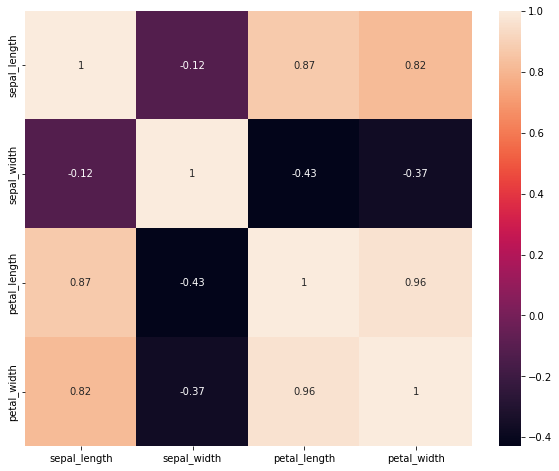

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

**Correlação de Spearman:**

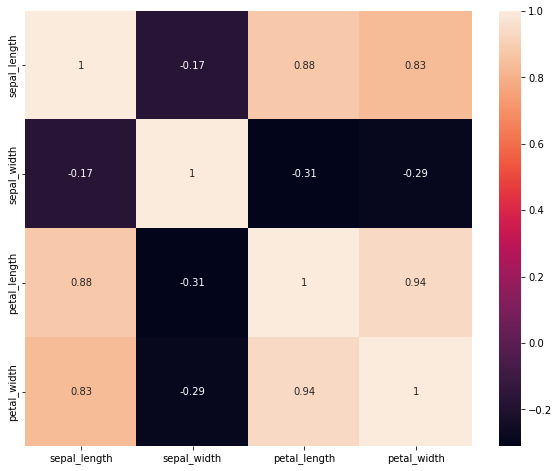

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr("spearman"), annot=True)

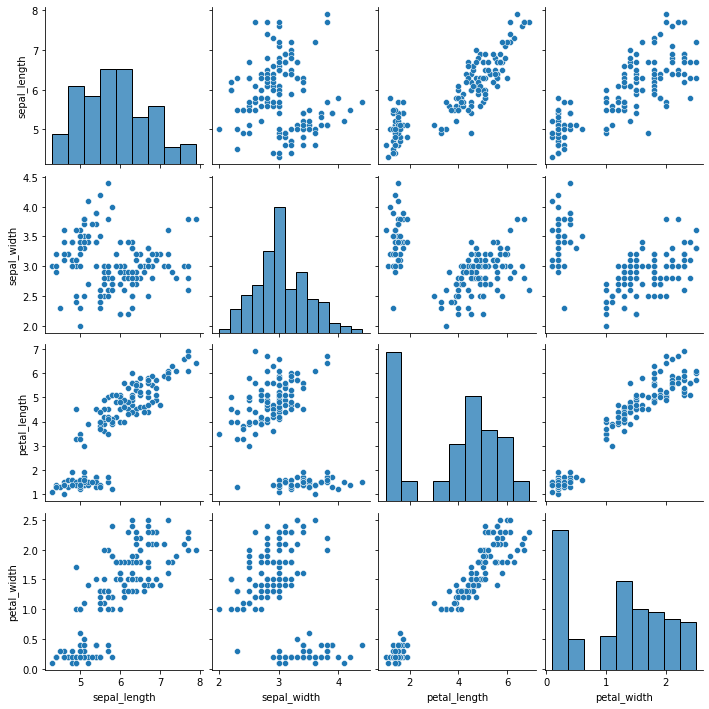

In [12]:
sns.pairplot(df);

**Vemos abaixo nos gráficos que há correlações positivas altas, baixas entre as Features abaixo e o Target de acordo com a correlação de Pearson.**

**Sépalas - Comprimento x Largura - Correlação positiva em todas as espécies:**

Quanto maior o comprimento da Sépalas em todas as espécies a tendência é que as larguras das Sépalas também cresçam

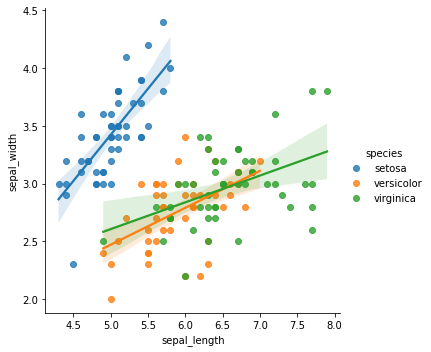

In [13]:
sns.lmplot(data=df, x="sepal_length", y="sepal_width", hue="species");

**Pétalas - Comprimento x Largura - Correlação positiva**

Quanto maior o comprimento das Pétalas em todas as espécies a tendência é que as larguras das Sépalas também cresçam

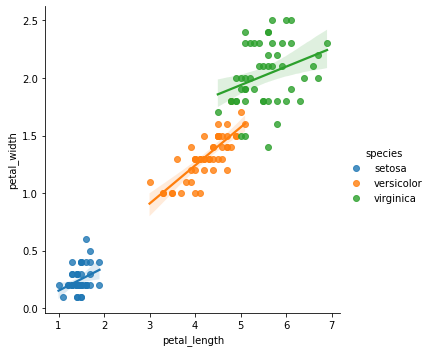

In [14]:
sns.lmplot(data=df, x="petal_length", y="petal_width", hue="species");

**Pétalas e Sépalas - Comprimento - Correlação positiva**

Quanto maior o comprimento das Pétalas em todas as espécies a tendência é que os comprimentos das Sépalas também cresçam

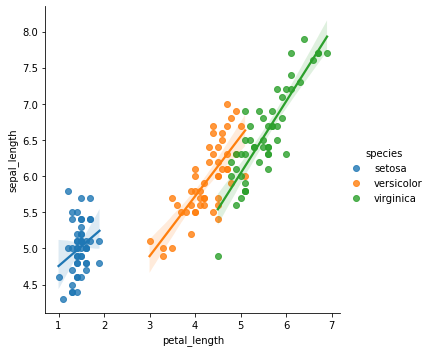

In [15]:
sns.lmplot(data=df, x="petal_length", y="sepal_length", hue="species");

**Pétalas e Sépalas - Largura - Correlação positiva**

Quanto maior a largura das Pétalas em todas as espécies a tendência é que as larguras das Sépalas também cresçam

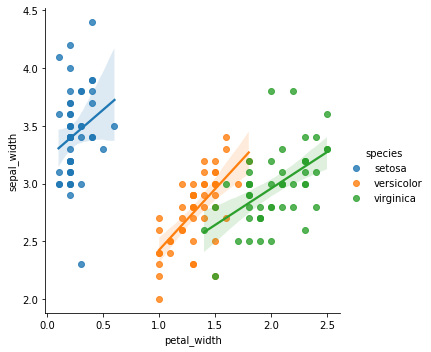

In [16]:
sns.lmplot(data=df, x="petal_width", y="sepal_width", hue="species");

**Pétalas e Sépalas - Comprimento x Largura - Correlação positiva**

Quanto maior a largura das Sépalas em todas as espécies a tendência é que as larguras das Pétalas também cresçam

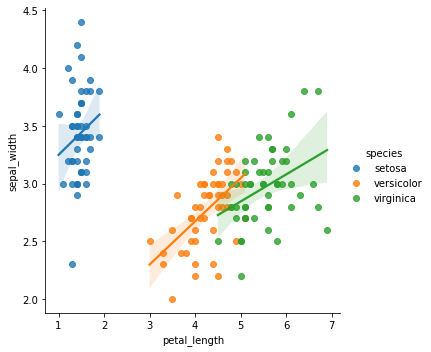

In [17]:
sns.lmplot(data=df, x="petal_length", y="sepal_width", hue="species");

Quanto maior a largura das Pétalas em todas as espécies a tendência é que as larguras das Sépalas também cresçam

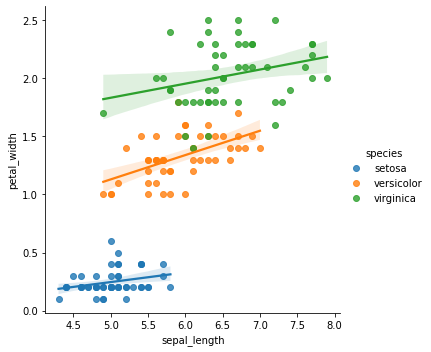

In [18]:
sns.lmplot(data=df, x="sepal_length", y="petal_width", hue="species");

### **Intervalo de confiança - Média do comprimento da Pétalas**

**Nível de confiança = 95%**

Iremos pegar 50 amostras de forma aleatória:

In [19]:
import random
lista = []
for num in df["petal_length"]:
  lista.append(num)
dados = random.sample(lista,50)

Média amostral:

In [20]:
media = pd.DataFrame(dados).mean()
media = media[0]
media

3.67

Desvio padrão amostral:

In [21]:
desvio_padrao = pd.DataFrame(dados).std()
desvio_padrao  = desvio_padrao[0]
desvio_padrao 

1.7979864020733907

Número de amostras:

In [22]:
n = len(dados)
n

50

In [23]:
from scipy.stats import norm
from scipy import stats
import math

In [24]:
stats.sem(dados)

0.2542736754774594

In [25]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(3.171632753847554, 4.168367246152446)

In [26]:
margem_erro = media - intervalos[0]
margem_erro

0.498367246152446

**Temos 95% de confiança que a média geral do comprimento das Pétalas estará entre 3.17cm e 4.16cm com uma margem de erro de 0.49 para mais e para menos**

**De fato confirmamos abaixo que a média geral está dentro do intervalo:**

In [27]:
df["petal_length"].mean()

3.7580000000000005

## **Verificando se há outliers, analisando os quartis:**

In [29]:
def col_feature(col):
  plt.figure(figsize=(8,5))
  sns.boxplot(x=df[col]);
  Q1 = df[col].quantile(q=0.25) # Primeiro quartil
  Q2 = df[col].quantile(q=0.50) # Segundo quartil
  Q3 = df[col].quantile(q=0.75) # Terceiro quartil

  IQR = Q3 - Q1 # Intervalo interquartílico
  inf = Q1 - 1.5 * IQR
  sup = Q3 + 1.5 * IQR
  media = df[col].mean()
  mediana = df[col].median()
  moda = pd.DataFrame(df[col].value_counts()).index[0]
  print("="*30)
  print(f"{col}")
  print("="*30)
  print(f"Primeiro quartil: {Q1}")
  print(f"Segundo quartil: {Q2}")
  print(f"Terceiro quartil: {Q3}")
  print(f"Intervalo interquartílico: {IQR:.2f}")
  print(f"Limite superior: {sup:.2f}")
  print(f"Limite inferior: {inf:.2f}")
  print(f"Média geral: {media:.2f}")
  print(f"Mediana: {mediana:.2f}")
  print(f"Moda-Valor mais frequente: {moda:.2f}")


sepal_length
Primeiro quartil: 5.1
Segundo quartil: 5.8
Terceiro quartil: 6.4
Intervalo interquartílico: 1.30
Limite superior: 8.35
Limite inferior: 3.15
Média geral: 5.84
Mediana: 5.80
Moda-Valor mais frequente: 5.00


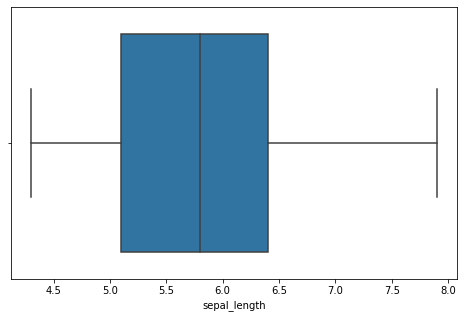

In [30]:
col_feature("sepal_length")

sepal_width
Primeiro quartil: 2.8
Segundo quartil: 3.0
Terceiro quartil: 3.3
Intervalo interquartílico: 0.50
Limite superior: 4.05
Limite inferior: 2.05
Média geral: 3.06
Mediana: 3.00
Moda-Valor mais frequente: 3.00


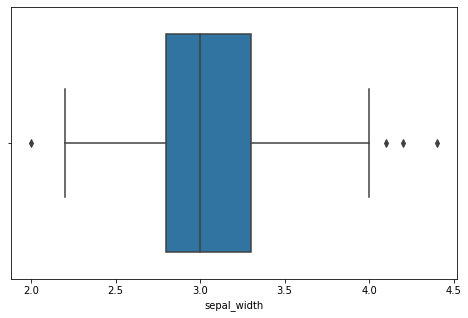

In [31]:
col_feature("sepal_width")

petal_length
Primeiro quartil: 1.6
Segundo quartil: 4.35
Terceiro quartil: 5.1
Intervalo interquartílico: 3.50
Limite superior: 10.35
Limite inferior: -3.65
Média geral: 3.76
Mediana: 4.35
Moda-Valor mais frequente: 1.40


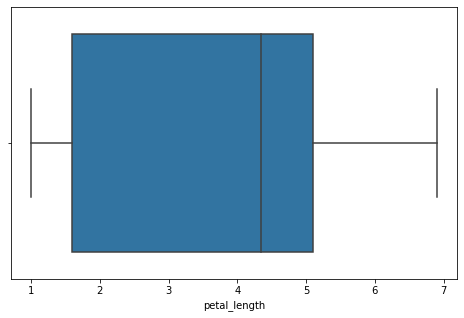

In [32]:
col_feature("petal_length")

petal_width
Primeiro quartil: 0.3
Segundo quartil: 1.3
Terceiro quartil: 1.8
Intervalo interquartílico: 1.50
Limite superior: 4.05
Limite inferior: -1.95
Média geral: 1.20
Mediana: 1.30
Moda-Valor mais frequente: 0.20


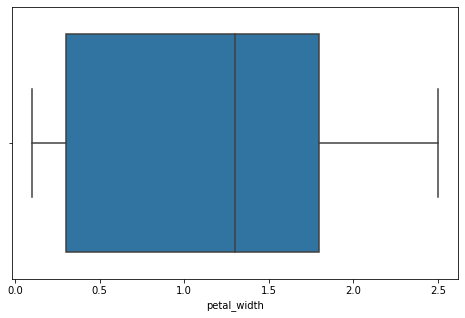

In [33]:
col_feature("petal_width")

## **Quantidade dos valores de cada Features:**

###**Comprimento e largura das Sépalas e Pétalas com todas as espécies**:

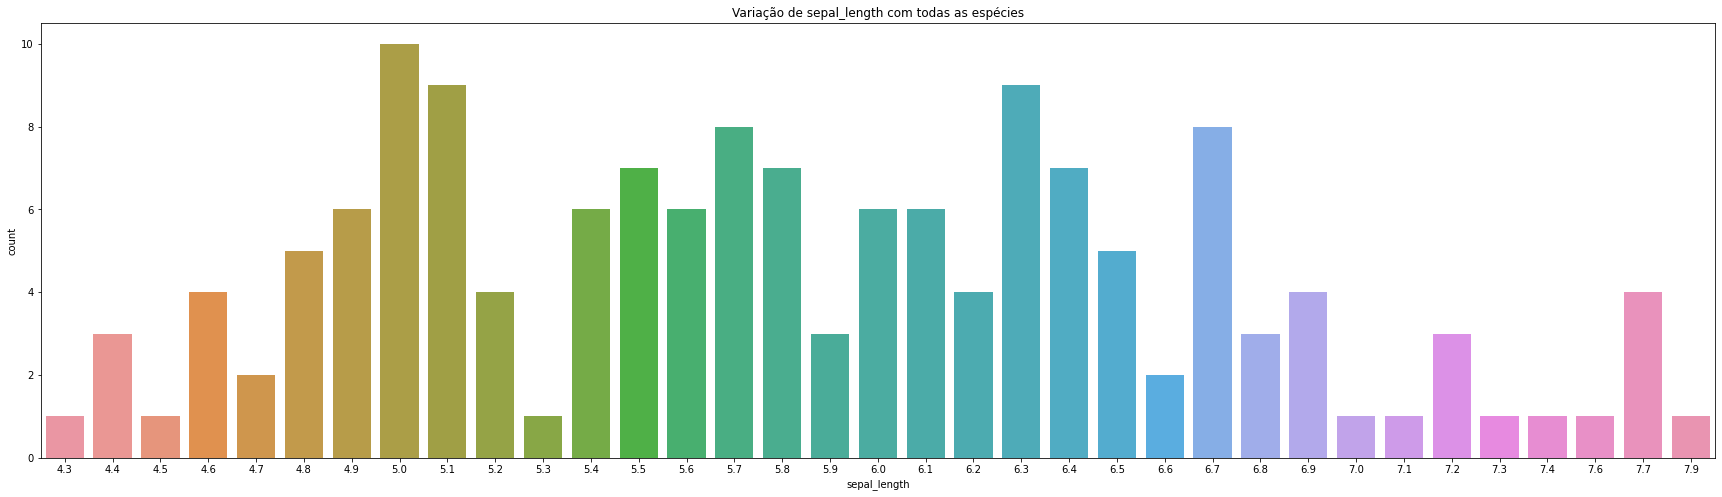

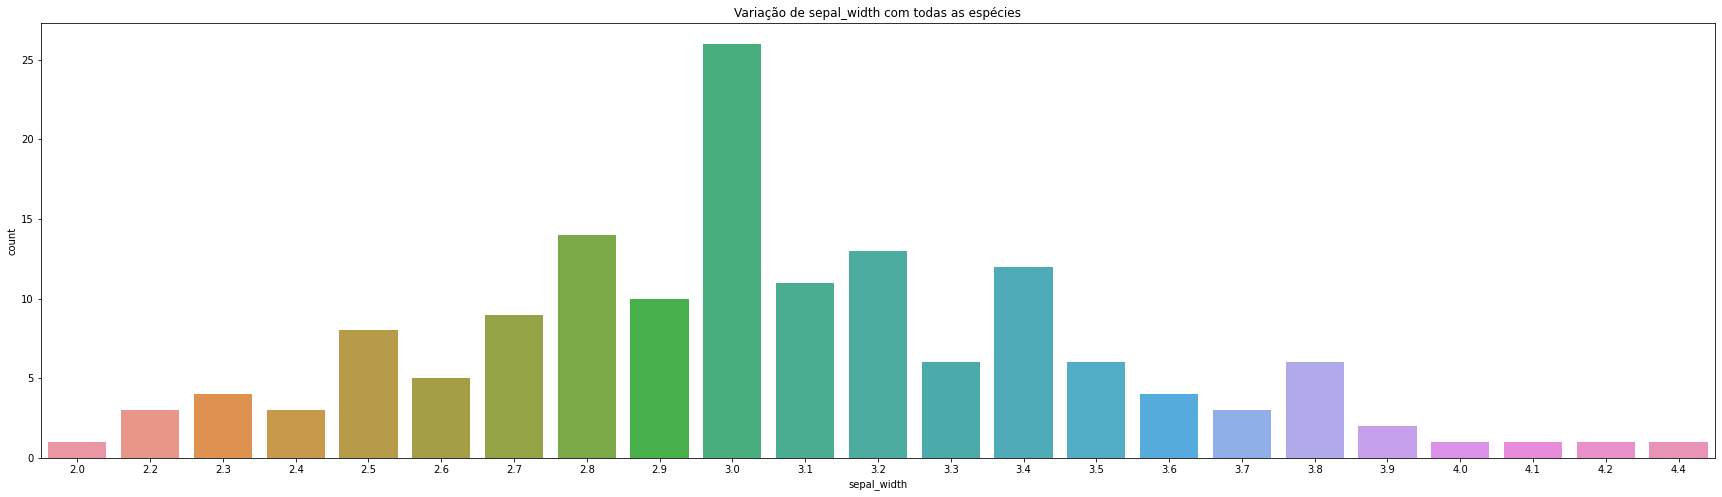

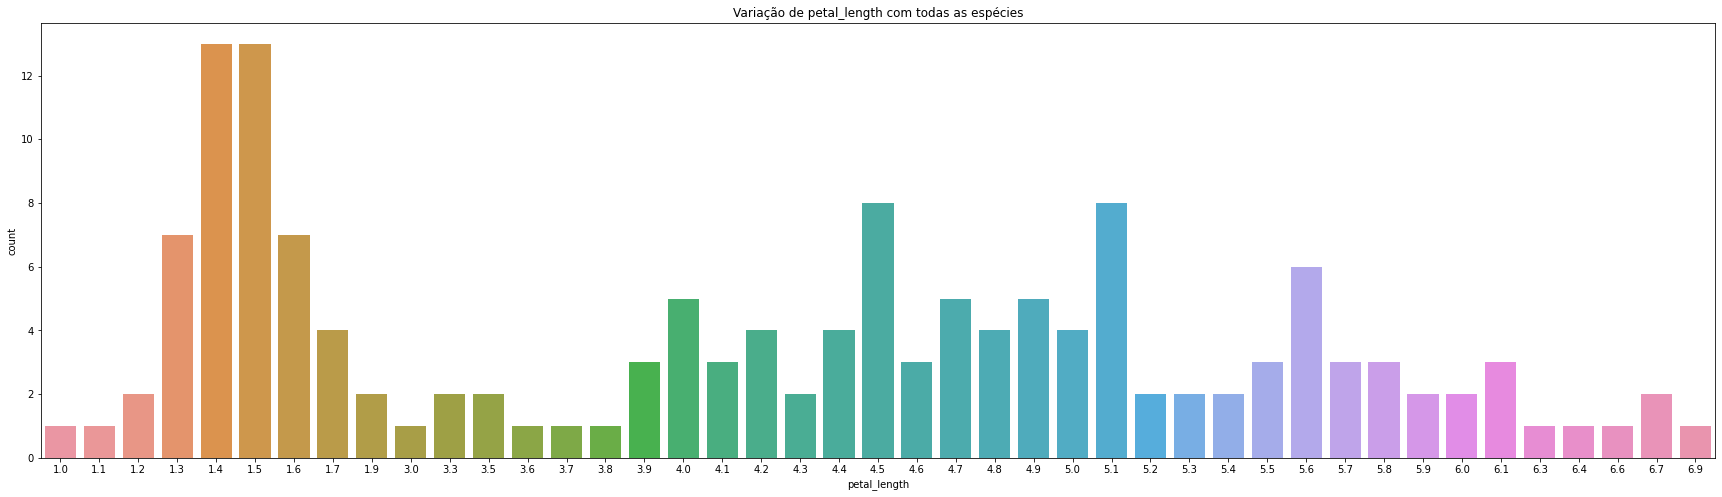

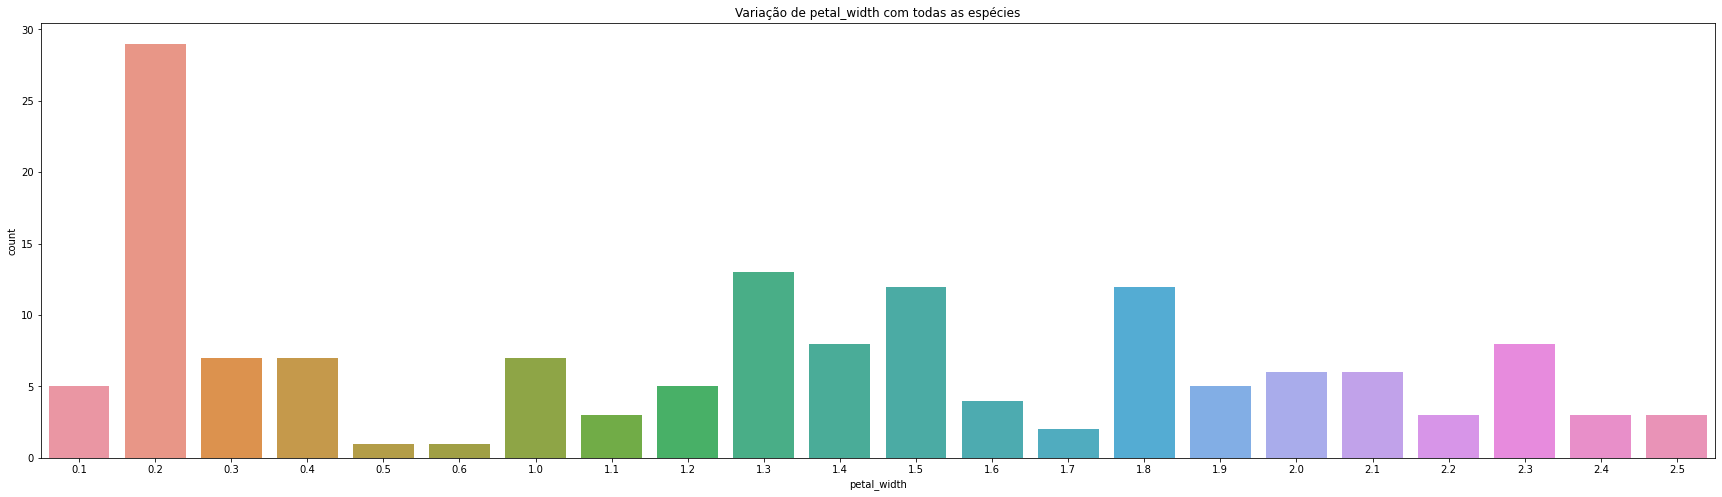

In [34]:
categ = df.select_dtypes(include=np.number)
for c in categ:
  plt.figure(figsize=(30,8))
  sns.countplot(data=df, x=c)
  plt.title(f"Variação de {c} com todas as espécies");

###**Comprimento e largura das Sépalas e Pétalas por espécie**:

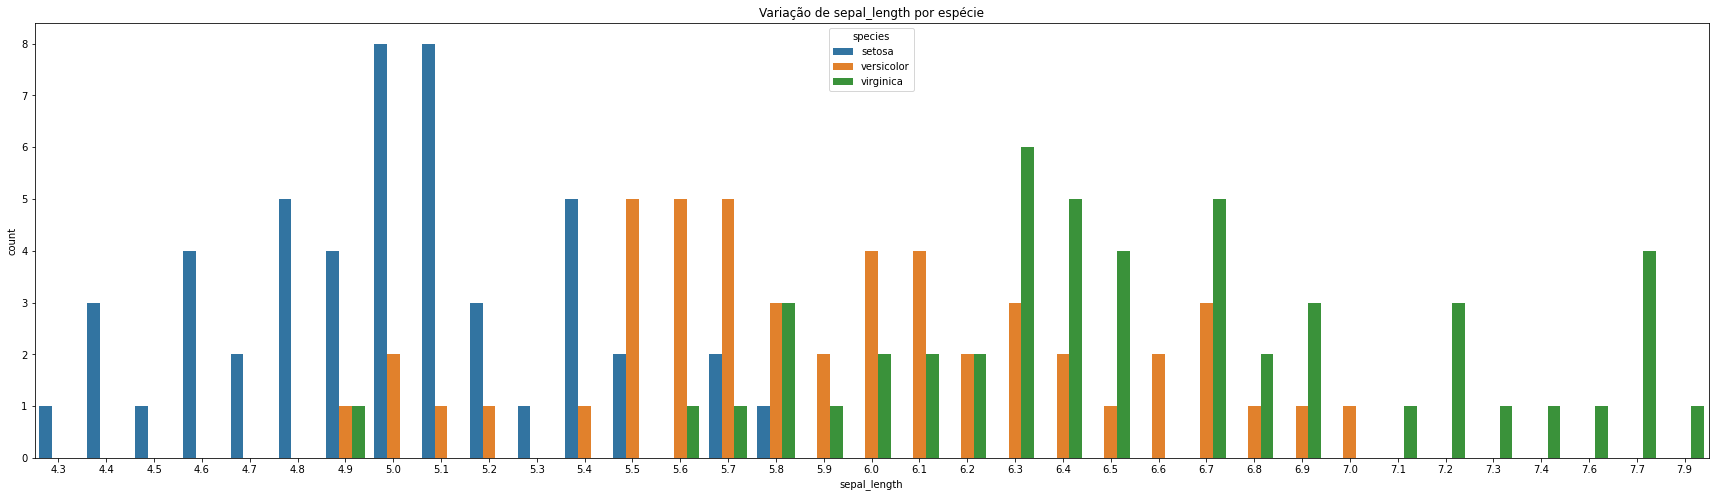

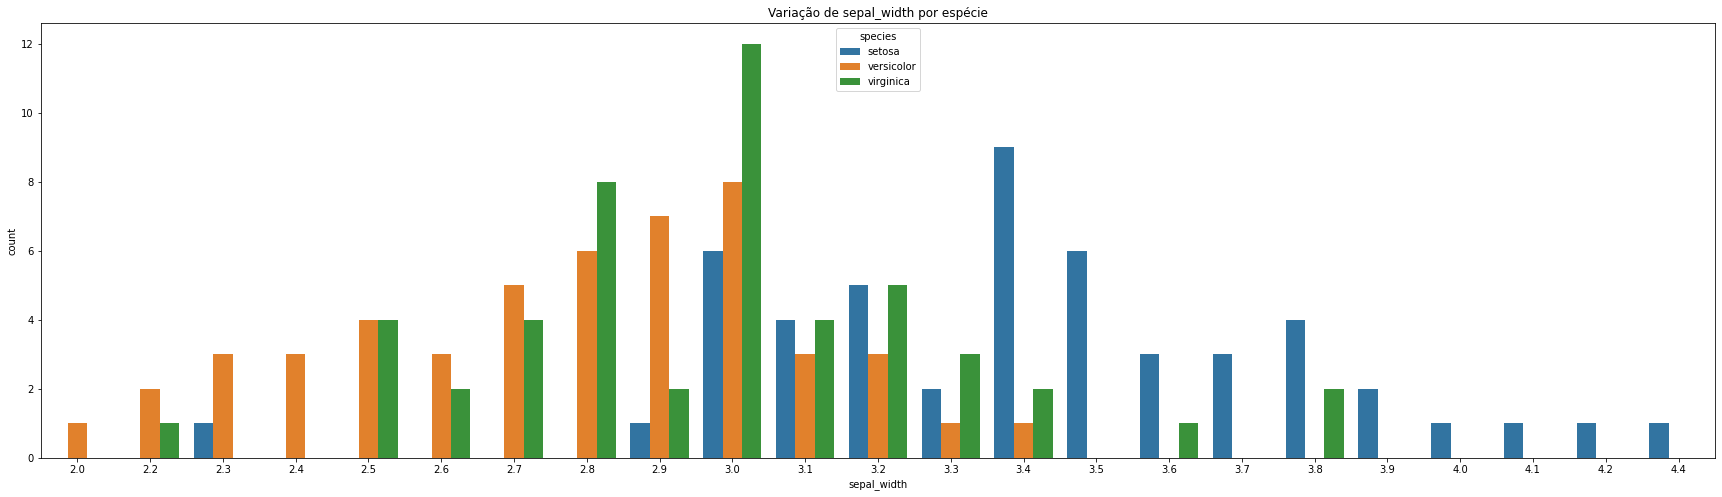

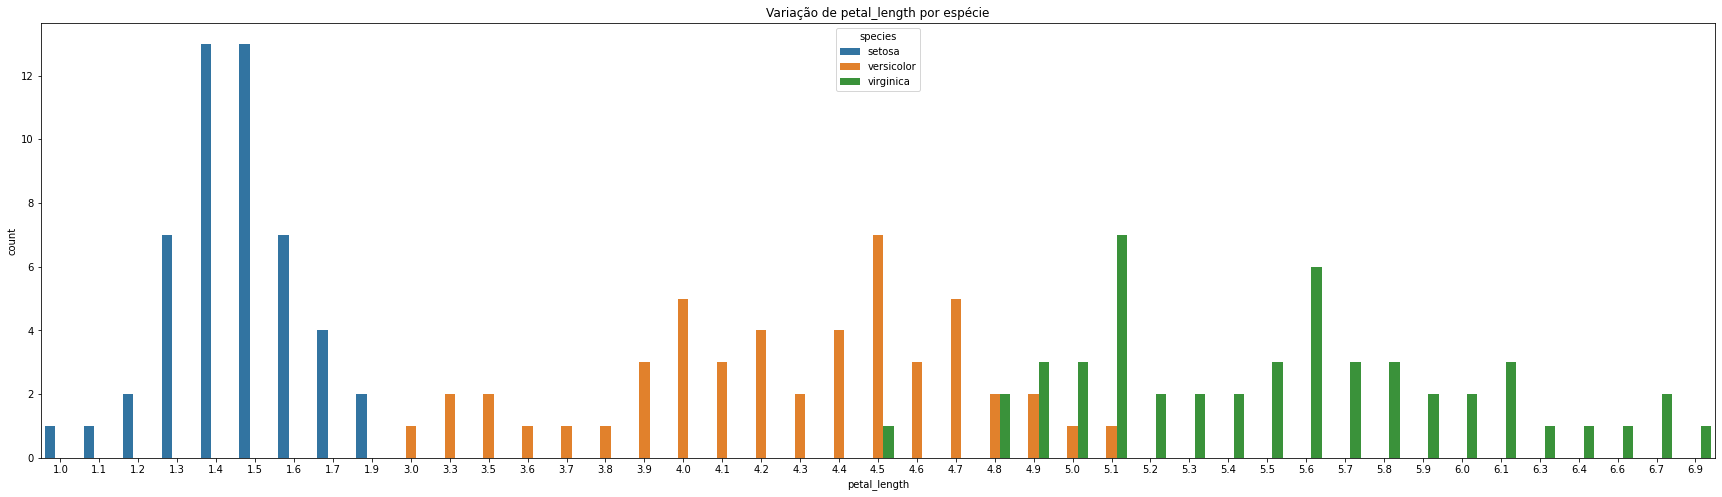

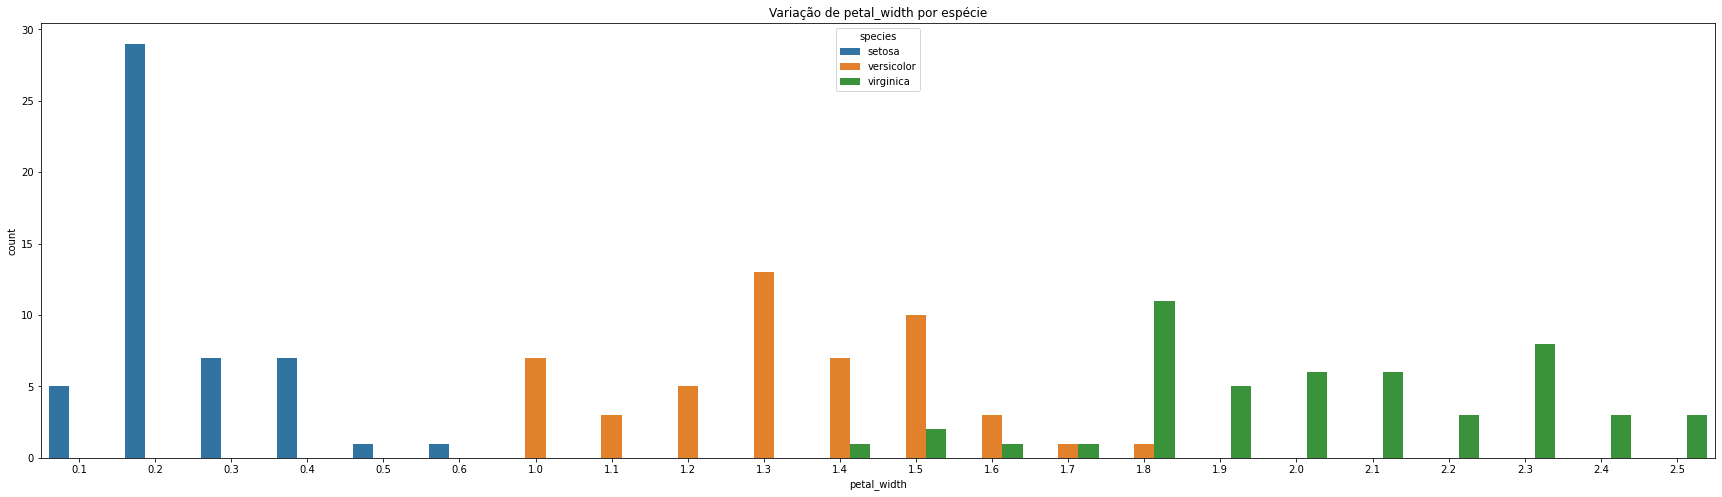

In [35]:
categ = df.select_dtypes(include=np.number)
for c in categ:
  plt.figure(figsize=(30,8))
  sns.countplot(data=df, x=c, hue="species")
  plt.title(f"Variação de {c} por espécie");

##**Proporções entre diferentes Features**:

### **Relação de Comprimento e Largura das Sépalas entre todas as espécies**

In [39]:
media_sepala = (df["sepal_length"].mean())/(df["sepal_width"].mean())
print(f"A média de comprimento das Sépalas é {media_sepala:.2f}x maior do que a média da sua largura")

A média de comprimento das Sépalas é 1.91x maior do que a média da sua largura


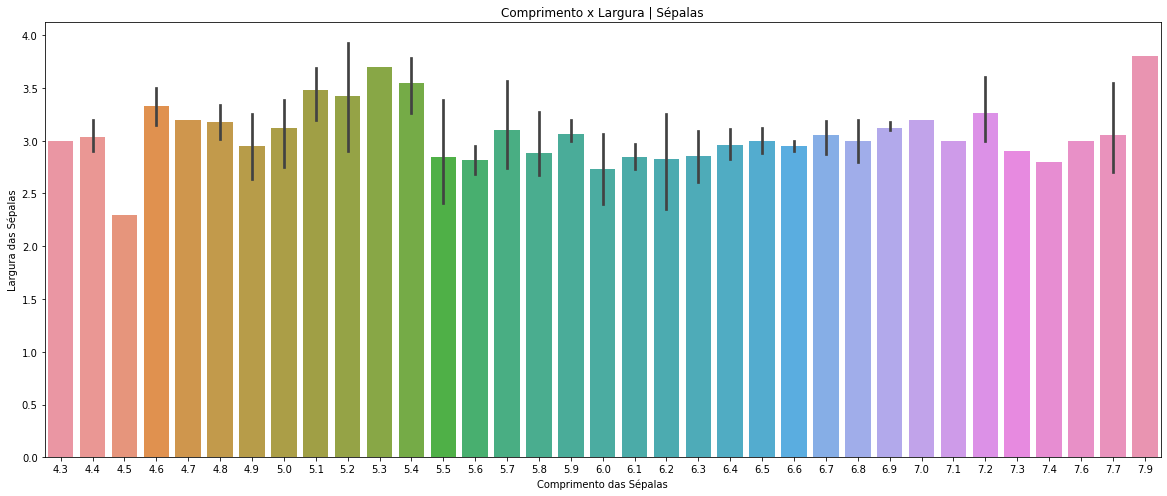

In [40]:
species_sepal_length_width = df[["species", "sepal_length", "sepal_width"]]
plt.figure(figsize=(20,8))
sns.barplot(data=species_sepal_length_width, x="sepal_length", y="sepal_width")
plt.title("Comprimento x Largura | Sépalas")
plt.xlabel("Comprimento das Sépalas")
plt.ylabel("Largura das Sépalas");

**Podemos visualizar através de outro gráfico, desta vez observando cada amostra:**

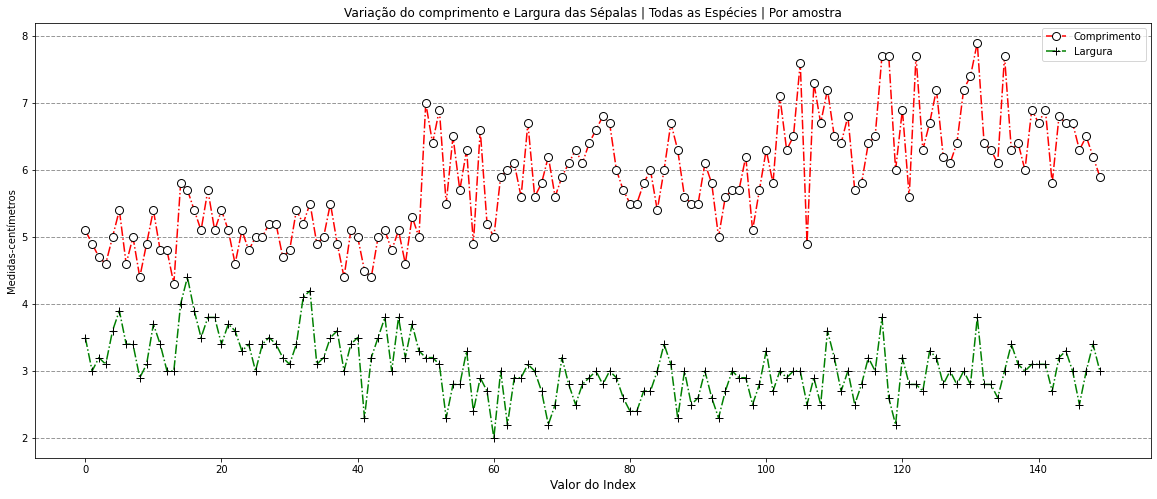

In [41]:
plt.figure(figsize=(20, 8))
# Insere a primeira linha no plot
plt.plot(df["sepal_length"], color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.")
# Insere a segunda linha no plot
plt.plot(df["sepal_width"], color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.")

# Rótulos
plt.title("Variação do comprimento e Largura das Sépalas | Todas as Espécies | Por amostra", loc="center")
plt.xlabel("Valor do Index", size=12)
plt.ylabel("Medidas-centímetros")
plt.legend(["Comprimento", "Largura"]) #bbox_to_anchor=(0.6, 1.2))

#Gridlines

plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()

### **relação de Comprimento e Largura das Pétalas entre todas as espécies**

In [42]:
media_petala = (df["petal_length"].mean())/(df["petal_width"].mean())
print(f"A média de comprimento das Pétalas é {media_petala:.2f}x maior do que a média da sua largura")

A média de comprimento das Pétalas é 3.13x maior do que a média da sua largura


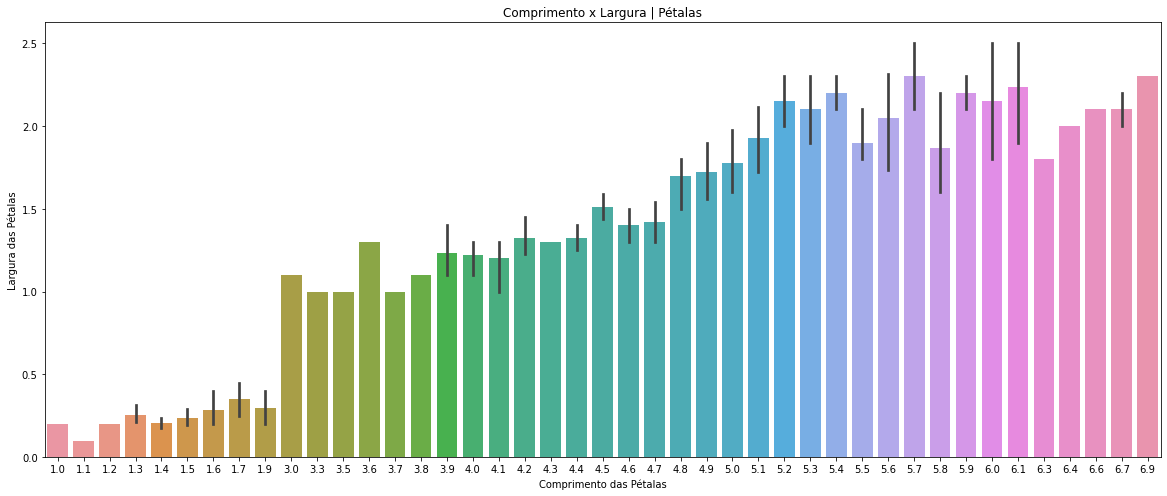

In [43]:
species_petal_length_width = df[["species", "petal_length", "petal_width"]]
plt.figure(figsize=(20,8))
sns.barplot(data=species_petal_length_width, x="petal_length", y="petal_width")
plt.title("Comprimento x Largura | Pétalas")
plt.xlabel("Comprimento das Pétalas")
plt.ylabel("Largura das Pétalas");

**Podemos visualizar através de outro gráfico, desta vez pegando por amostra:**

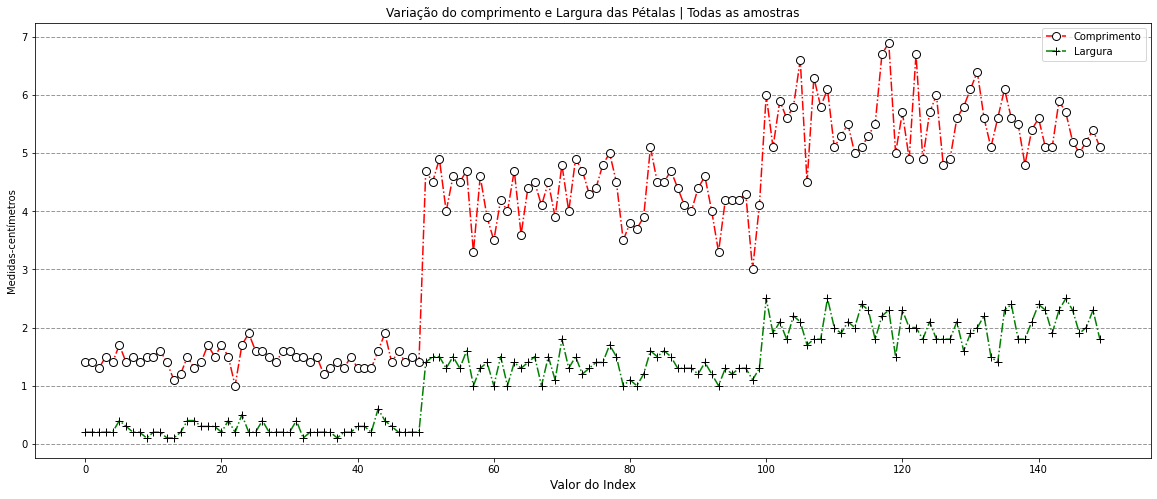

In [44]:
plt.figure(figsize=(20, 8))
# Insere a primeira linha no plot
plt.plot(df["petal_length"], color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.")
# Insere a segunda linha no plot
plt.plot(df["petal_width"], color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.")

# Rótulos
plt.title("Variação do comprimento e Largura das Pétalas | Todas as amostras", loc="center")
plt.xlabel("Valor do Index", size=12)
plt.ylabel("Medidas-centímetros")
plt.legend(["Comprimento", "Largura"]) #bbox_to_anchor=(0.6, 1.2))

#Gridlines

plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()


### **Relação de Comprimento e Largura das Sépalas por espécies separadamente:**

**1.0 | Iris-Setosa**

**1.1 | Pétalas**

In [45]:
setosa = df[df["species"]=="setosa"]
media_petala_setosa = (setosa["petal_length"].mean())/(df["petal_width"].mean())
print(f"A média de comprimento das Pétalas é em média {media_petala_setosa :.2f}x maior do que a média da sua largura")

A média de comprimento das Pétalas é em média 1.22x maior do que a média da sua largura


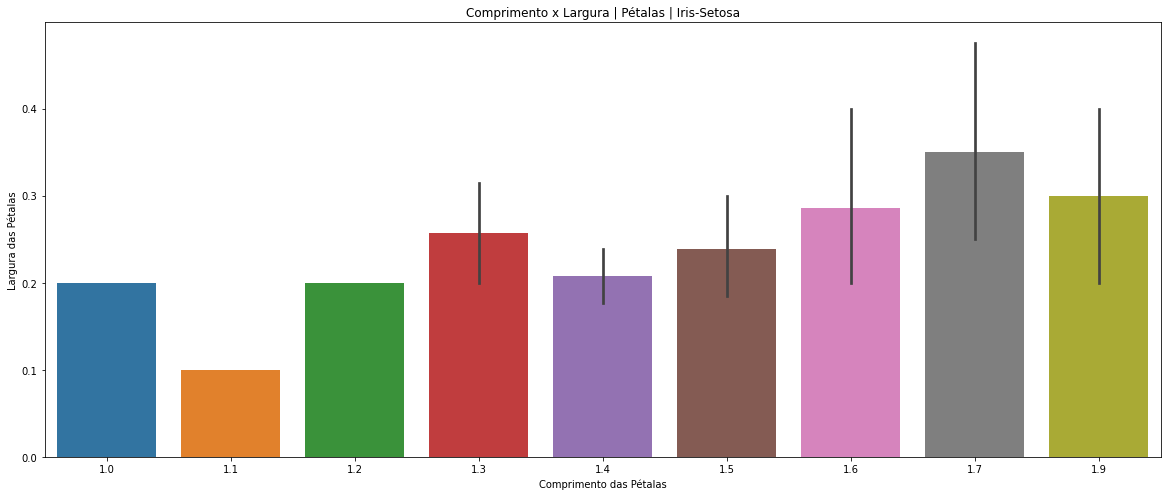

In [46]:
setosa_petal_length_width = setosa[["species", "petal_length", "petal_width"]]
plt.figure(figsize=(20,8))
sns.barplot(data=setosa_petal_length_width, x="petal_length", y="petal_width")
plt.title("Comprimento x Largura | Pétalas | Iris-Setosa")
plt.xlabel("Comprimento das Pétalas")
plt.ylabel("Largura das Pétalas");

**Por amostra:**

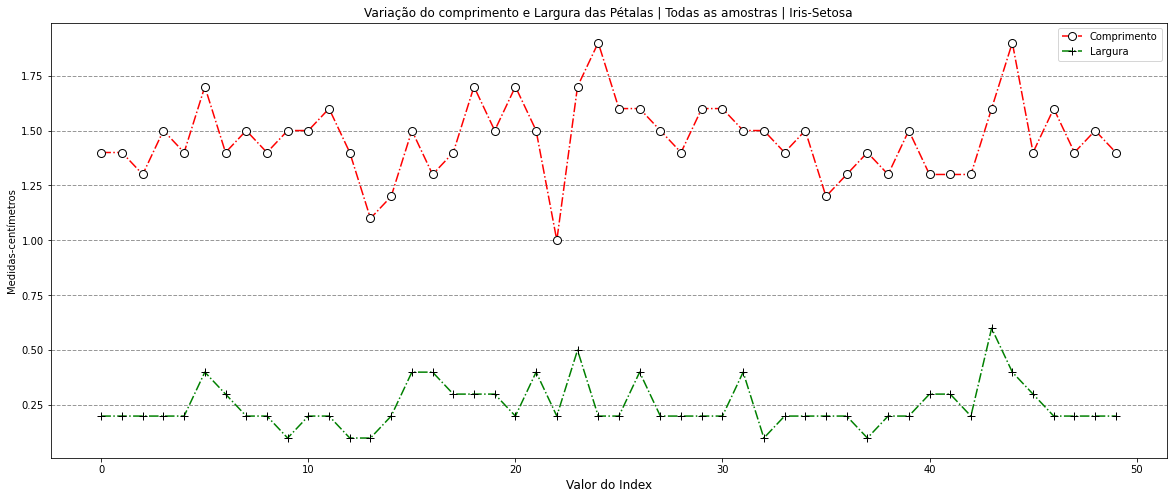

In [47]:
plt.figure(figsize=(20, 8))
# Insere a primeira linha no plot
plt.plot(setosa_petal_length_width["petal_length"], color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.")
# Insere a segunda linha no plot
plt.plot(setosa_petal_length_width["petal_width"], color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.")

# Rótulos
plt.title("Variação do comprimento e Largura das Pétalas | Todas as amostras | Iris-Setosa", loc="center")
plt.xlabel("Valor do Index", size=12)
plt.ylabel("Medidas-centímetros")
plt.legend(["Comprimento", "Largura"]) #bbox_to_anchor=(0.6, 1.2))

#Gridlines

plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()

**1.2 | Sépalas**

In [48]:
media_sepala_setosa = (setosa["sepal_length"].mean())/(setosa["sepal_width"].mean())
print(f"A média de comprimento das Sépalas é em média {media_sepala_setosa:.2f}x maior do que a média da sua largura")

A média de comprimento das Sépalas é em média 1.46x maior do que a média da sua largura


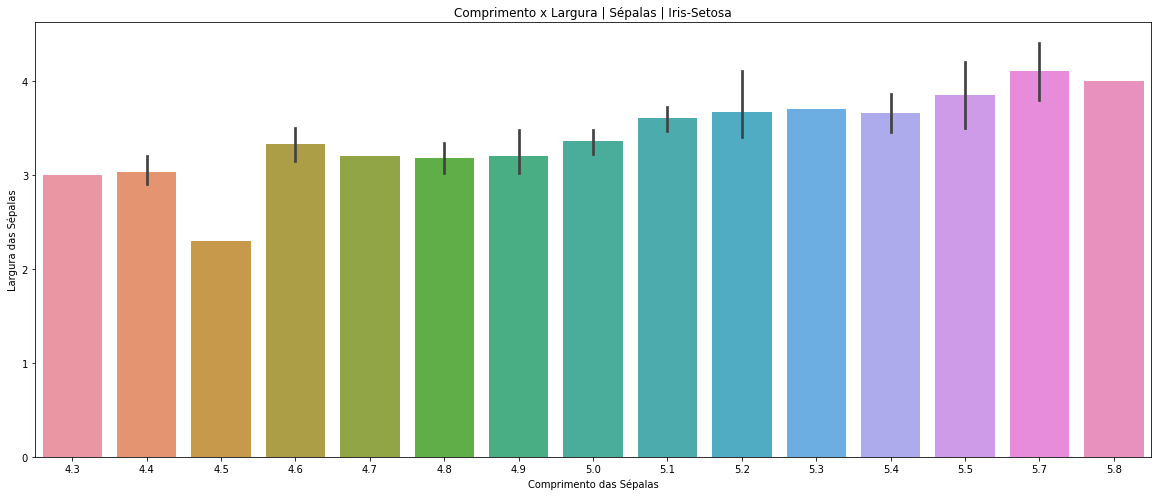

In [49]:
setosa_petal_length_width = setosa[["species", "sepal_length", "sepal_width"]]
plt.figure(figsize=(20,8))
sns.barplot(data=setosa_petal_length_width, x="sepal_length", y="sepal_width")
plt.title("Comprimento x Largura | Sépalas | Iris-Setosa")
plt.xlabel("Comprimento das Sépalas")
plt.ylabel("Largura das Sépalas");

**Por amostra:**

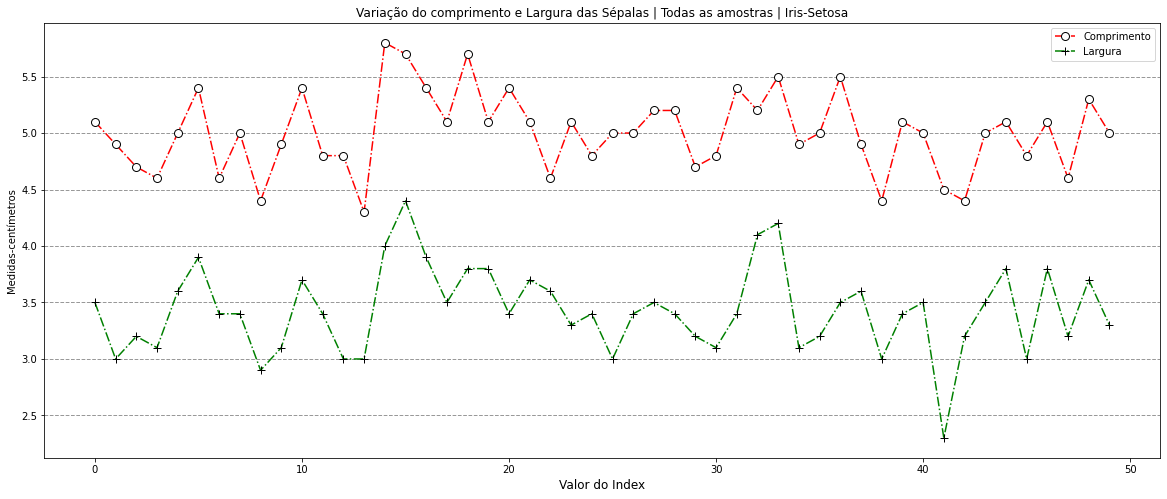

In [50]:
plt.figure(figsize=(20, 8))
# Insere a primeira linha no plot
plt.plot(setosa_petal_length_width["sepal_length"], color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.")
# Insere a segunda linha no plot
plt.plot(setosa_petal_length_width["sepal_width"], color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.")

# Rótulos
plt.title("Variação do comprimento e Largura das Sépalas | Todas as amostras | Iris-Setosa", loc="center")
plt.xlabel("Valor do Index", size=12)
plt.ylabel("Medidas-centímetros")
plt.legend(["Comprimento", "Largura"]) #bbox_to_anchor=(0.6, 1.2))

#Gridlines

plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()



---





---



**2.0 | Iris-Versicolor**

**2.1 | Pétalas**

In [51]:
versicolor = df[df["species"]=="versicolor"]
media_petala_versicolor = (versicolor["petal_length"].mean())/(df["petal_width"].mean())
print(f"A média de comprimento das Pétalas é em média {media_petala_versicolor :.2f}x maior do que a média da sua largura")

A média de comprimento das Pétalas é em média 3.55x maior do que a média da sua largura


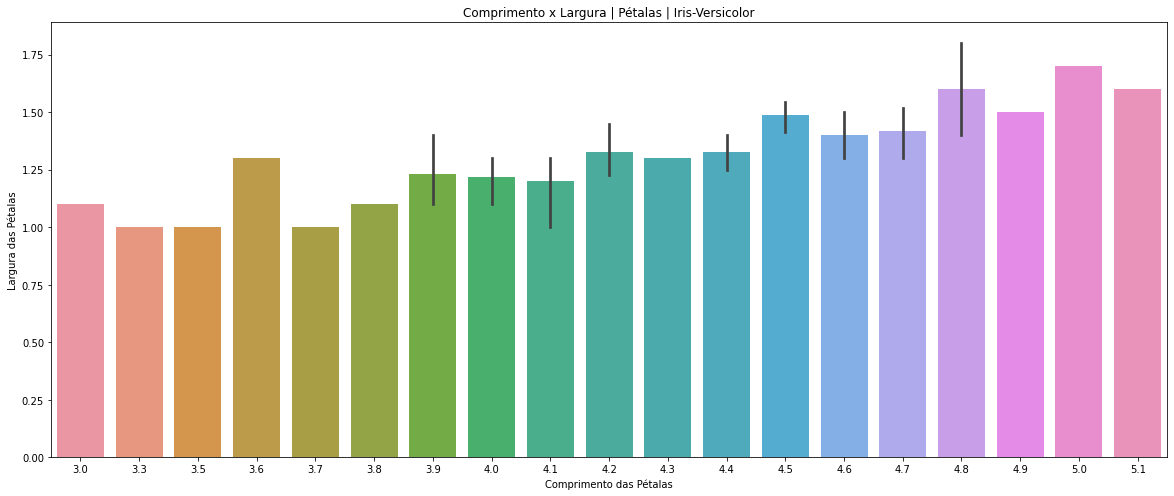

In [52]:
versicolor_petal_length_width = versicolor[["species", "petal_length", "petal_width"]]
plt.figure(figsize=(20,8))
sns.barplot(data=versicolor_petal_length_width, x="petal_length", y="petal_width")
plt.title("Comprimento x Largura | Pétalas | Iris-Versicolor")
plt.xlabel("Comprimento das Pétalas")
plt.ylabel("Largura das Pétalas");

**Por amostra:**

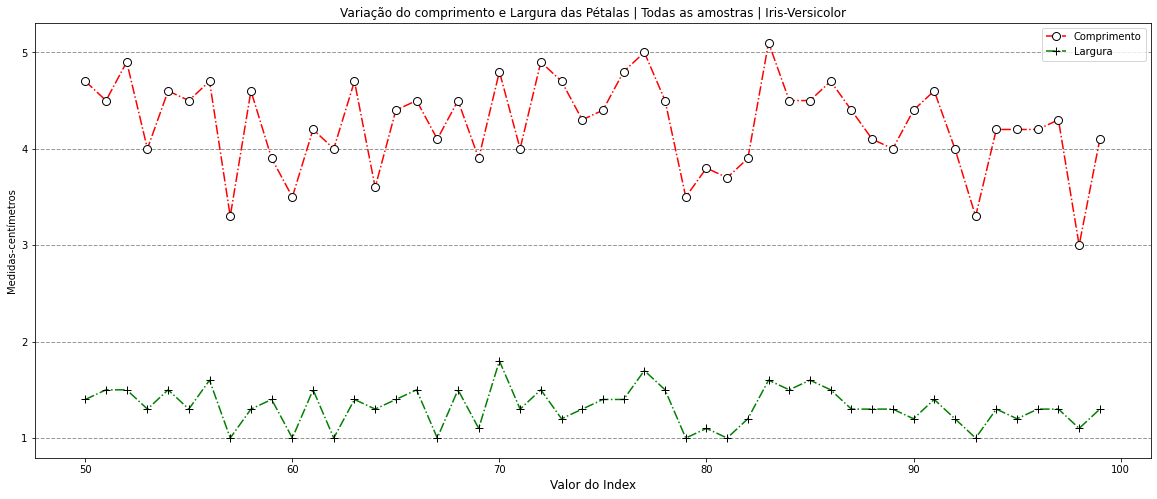

In [53]:
plt.figure(figsize=(20, 8))
# Insere a primeira linha no plot
plt.plot(versicolor_petal_length_width["petal_length"], color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.")
# Insere a segunda linha no plot
plt.plot(versicolor_petal_length_width["petal_width"], color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.")

# Rótulos
plt.title("Variação do comprimento e Largura das Pétalas | Todas as amostras | Iris-Versicolor", loc="center")
plt.xlabel("Valor do Index", size=12)
plt.ylabel("Medidas-centímetros")
plt.legend(["Comprimento", "Largura"]) #bbox_to_anchor=(0.6, 1.2))

#Gridlines

plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()

**2.2 | Sépalas**

In [54]:
media_sepala_versicolor = (versicolor["sepal_length"].mean())/(setosa["sepal_width"].mean())
print(f"A média de comprimento das Sépalas é em média {media_sepala_versicolor:.2f}x maior do que a média da sua largura")

A média de comprimento das Sépalas é em média 1.73x maior do que a média da sua largura


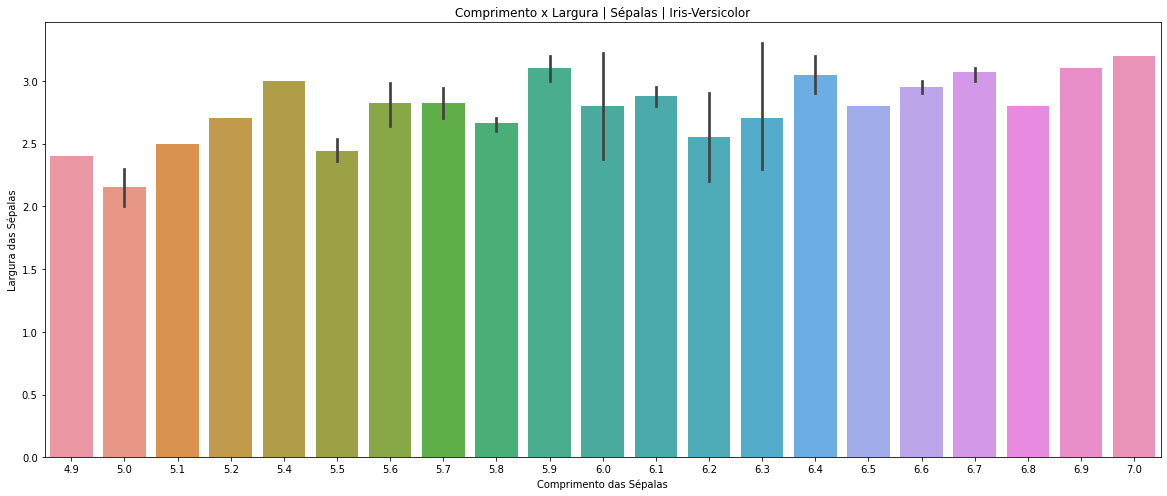

In [55]:
versicolor_petal_length_width = versicolor[["species", "sepal_length", "sepal_width"]]
plt.figure(figsize=(20,8))
sns.barplot(data=versicolor_petal_length_width, x="sepal_length", y="sepal_width")
plt.title("Comprimento x Largura | Sépalas | Iris-Versicolor")
plt.xlabel("Comprimento das Sépalas")
plt.ylabel("Largura das Sépalas");

**Por amostra:**

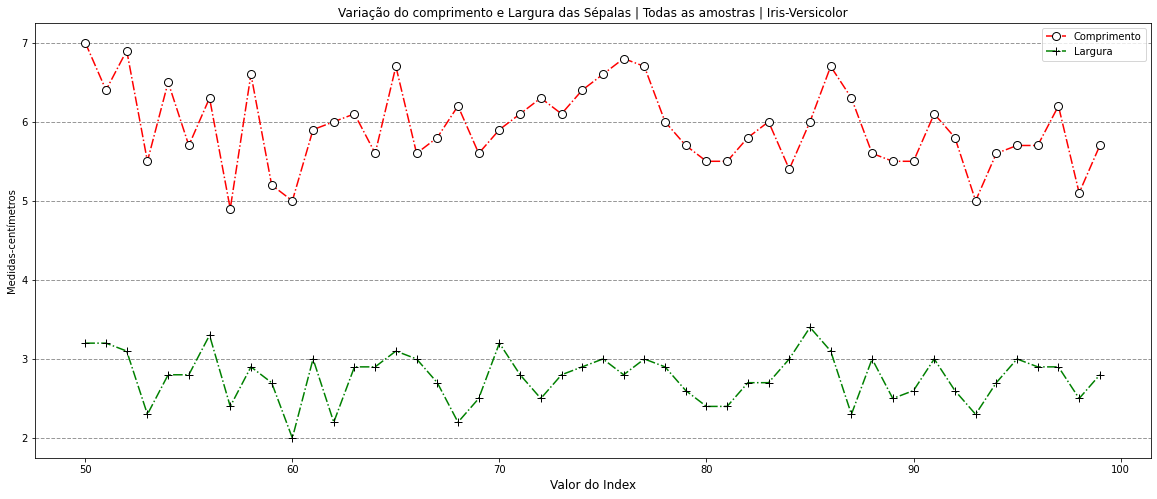

In [56]:
plt.figure(figsize=(20, 8))
# Insere a primeira linha no plot
plt.plot(versicolor_petal_length_width["sepal_length"], color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.")
# Insere a segunda linha no plot
plt.plot(versicolor_petal_length_width["sepal_width"], color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.")

# Rótulos
plt.title("Variação do comprimento e Largura das Sépalas | Todas as amostras | Iris-Versicolor", loc="center")
plt.xlabel("Valor do Index", size=12)
plt.ylabel("Medidas-centímetros")
plt.legend(["Comprimento", "Largura"]) #bbox_to_anchor=(0.6, 1.2))

#Gridlines

plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()



---









---



**3.0 | Iris-Virginica**

**3.1 | Pétalas**

In [57]:
virginica = df[df["species"]=="versicolor"]
media_petala_virginica  = (virginica ["petal_length"].mean())/(df["petal_width"].mean())
print(f"A média de comprimento das Pétalas é em média {media_petala_virginica:.2f}x maior do que a média da sua largura")

A média de comprimento das Pétalas é em média 3.55x maior do que a média da sua largura


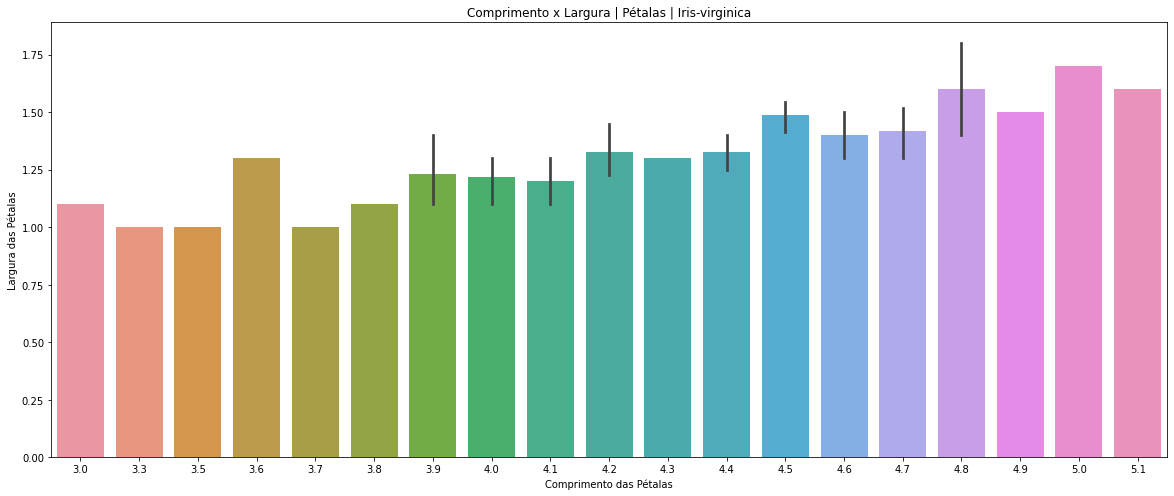

In [58]:
virginica_petal_length_width = virginica[["species", "petal_length", "petal_width"]]
plt.figure(figsize=(20,8))
sns.barplot(data=virginica_petal_length_width, x="petal_length", y="petal_width")
plt.title("Comprimento x Largura | Pétalas | Iris-virginica")
plt.xlabel("Comprimento das Pétalas")
plt.ylabel("Largura das Pétalas");

**Por amostra:**

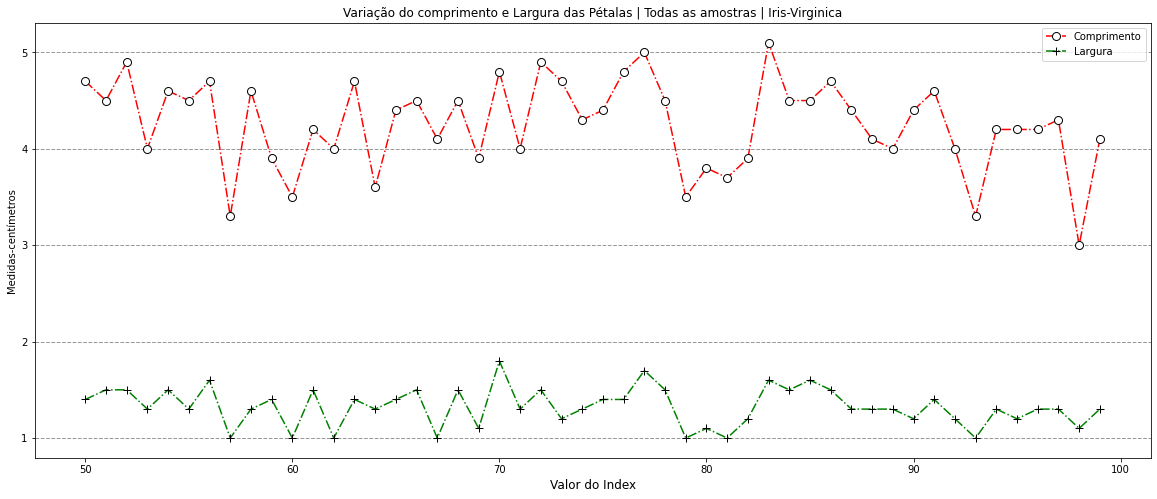

In [59]:
plt.figure(figsize=(20, 8))
# Insere a primeira linha no plot
plt.plot(virginica_petal_length_width["petal_length"], color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.")
# Insere a segunda linha no plot
plt.plot(virginica_petal_length_width["petal_width"], color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.")

# Rótulos
plt.title("Variação do comprimento e Largura das Pétalas | Todas as amostras | Iris-Virginica", loc="center")
plt.xlabel("Valor do Index", size=12)
plt.ylabel("Medidas-centímetros")
plt.legend(["Comprimento", "Largura"]) #bbox_to_anchor=(0.6, 1.2))

#Gridlines

plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()

**3.2 | Sépalas**

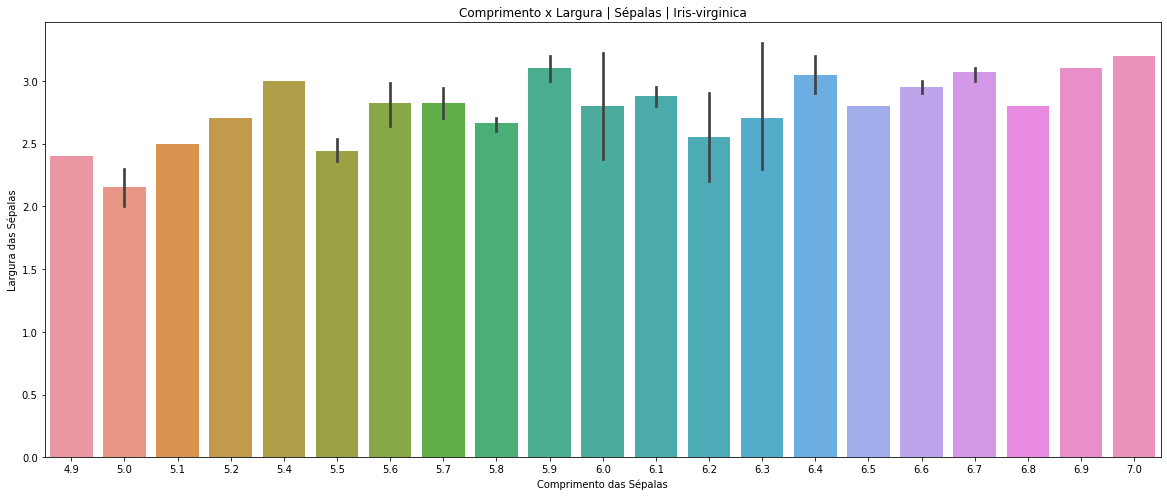

In [60]:
virginica_sepal_length_width = virginica[["species", "sepal_length", "sepal_width"]]
plt.figure(figsize=(20,8))
sns.barplot(data=virginica_sepal_length_width, x="sepal_length", y="sepal_width")
plt.title("Comprimento x Largura | Sépalas | Iris-virginica")
plt.xlabel("Comprimento das Sépalas")
plt.ylabel("Largura das Sépalas");

**Por amostra:**

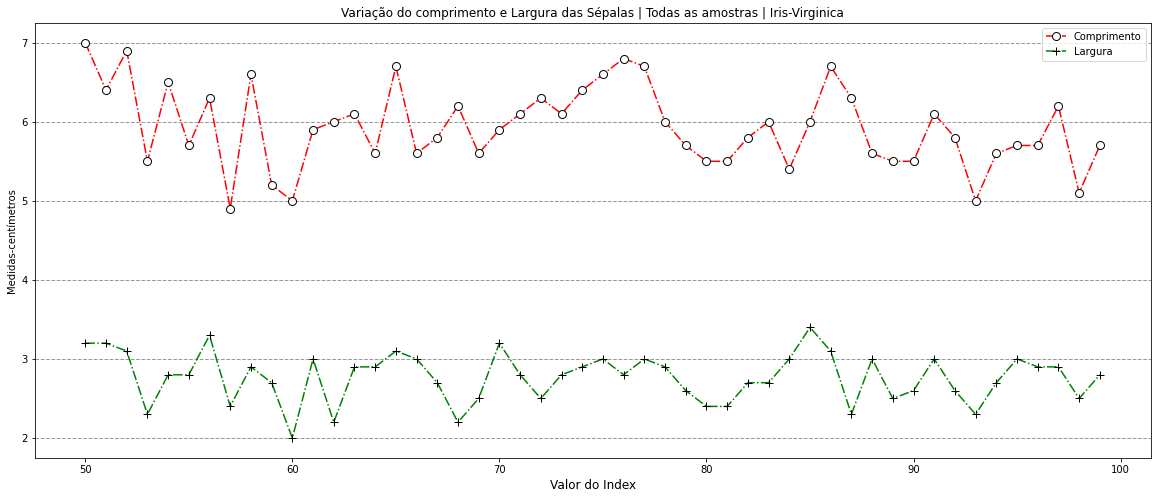

In [61]:
plt.figure(figsize=(20, 8))
# Insere a primeira linha no plot
plt.plot(virginica_sepal_length_width["sepal_length"], color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.")
# Insere a segunda linha no plot
plt.plot(virginica_sepal_length_width["sepal_width"], color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.")

# Rótulos
plt.title("Variação do comprimento e Largura das Sépalas | Todas as amostras | Iris-Virginica", loc="center")
plt.xlabel("Valor do Index", size=12)
plt.ylabel("Medidas-centímetros")
plt.legend(["Comprimento", "Largura"]) #bbox_to_anchor=(0.6, 1.2))

#Gridlines

plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()

##**Qual espécie tem o maior comprimento da Pétala e qual tem o maior comprimento da  Sépala?**

###**Pétala**

In [62]:
maior_petala = df.groupby(by="species")["petal_length"].max()
maior_petala = maior_petala.sort_values(ascending=False)[0]
print(f"A maior pétala tem {maior_petala}cm da espécie Virginica")

A maior pétala tem 6.9cm da espécie Virginica


**Informações gerais:**

In [63]:
maior_petala = df["petal_length"].max()
maior_petala = df[df["petal_length"] == maior_petala]
maior_petala

,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica


In [64]:
m_p_especie = df.groupby(by="species")["petal_length"].max()
m_p_especie = pd.DataFrame(m_p_especie)
m_p_especie.reset_index(inplace=True)

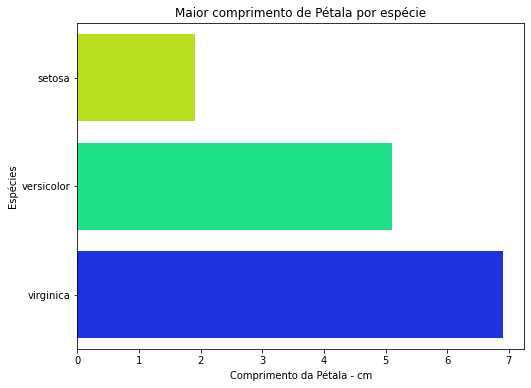

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(data=m_p_especie, x="petal_length", y="species", palette="gist_rainbow") 
plt.title("Maior comprimento de Pétala por espécie")
plt.xlabel("Comprimento da Pétala - cm")
plt.ylabel("Espécies");

###**Sépala**

In [66]:
maior_sepala = df.groupby(by="species")["sepal_length"].max()
maior_sepala = maior_sepala.sort_values(ascending=False)[0]
print(f"A maior Sépala tem {maior_sepala}cm da espécie Virginica")

A maior Sépala tem 7.9cm da espécie Virginica


**Informações gerais:**

In [67]:
maior_sepala = df["sepal_length"].max()
maior_sepala = df[df["sepal_length"] == maior_sepala]
maior_sepala

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica


In [68]:
m_s_especie = df.groupby(by="species")["sepal_length"].max()
m_s_especie = pd.DataFrame(m_s_especie)
m_s_especie.reset_index(inplace=True)

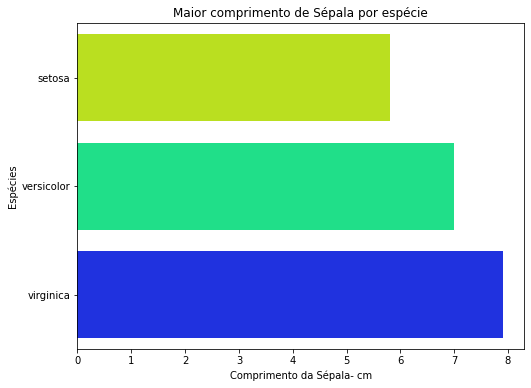

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(data=m_s_especie, x="sepal_length", y="species", palette="gist_rainbow") 
plt.title("Maior comprimento de Sépala por espécie")
plt.xlabel("Comprimento da Sépala- cm")
plt.ylabel("Espécies");

##**Qual espécie tem o menor comprimento da Pétala e qual tem o menor comprimento da  Sépala?**

###**Pétala**

In [70]:
menor_petala = df.groupby(by="species")["petal_length"].min()
menor_petala = menor_petala.sort_values(ascending=False)[2]
print(f"A menor pétala tem {menor_petala}cm da espécie Setosa")

A menor pétala tem 1.0cm da espécie Setosa


**Informações gerais:**

In [71]:
menor_petala = df["petal_length"].min()
menor_petala = df[df["petal_length"] == menor_petala]
menor_petala

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa


In [72]:
me_p_especie = df.groupby(by="species")["petal_length"].min()
me_p_especie = pd.DataFrame(me_p_especie)
me_p_especie.reset_index(inplace=True)

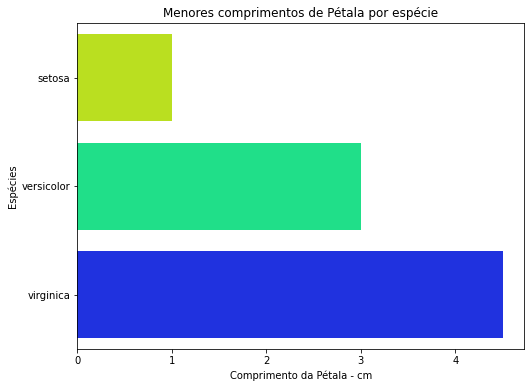

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(data=me_p_especie, x="petal_length", y="species", palette="gist_rainbow") 
plt.title("Menores comprimentos de Pétala por espécie")
plt.xlabel("Comprimento da Pétala - cm")
plt.ylabel("Espécies");

###**Sépala**

In [74]:
menor_sepala = df.groupby(by="species")["sepal_length"].min()
menor_sepala = menor_sepala.sort_values(ascending=False)[2]
print(f"A menor Sépala tem {menor_sepala}cm da espécie Setosa")

A menor Sépala tem 4.3cm da espécie Setosa


**Informações gerais:**

In [75]:
menor_sepala = df["sepal_length"].min()
menor_sepala = df[df["sepal_length"] == menor_sepala]
menor_sepala

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa


In [76]:
me_s_especie = df.groupby(by="species")["sepal_length"].min()
me_s_especie = pd.DataFrame(me_s_especie)
me_s_especie.reset_index(inplace=True)

In [77]:
me_s_especie

,species,sepal_length
0,setosa,4.3
1,versicolor,4.9
2,virginica,4.9


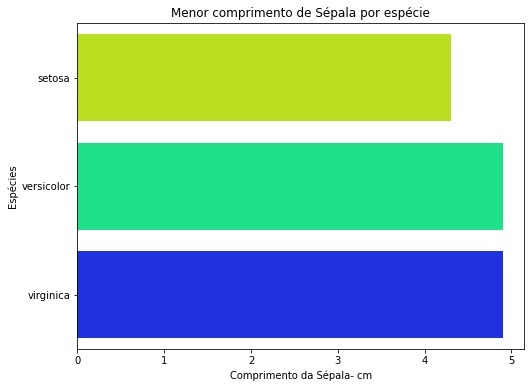

In [78]:
plt.figure(figsize=(8,6))
sns.barplot(data=me_s_especie, x="sepal_length", y="species", palette="gist_rainbow") 
plt.title("Menor comprimento de Sépala por espécie")
plt.xlabel("Comprimento da Sépala- cm")
plt.ylabel("Espécies");

## **Quais espécies tem maior e menor variação de largura nas Pétalas?**

In [79]:
var_especie = df.groupby(by="species")["petal_width"].var()
var_especie.sort_values(ascending=False, inplace=True)

In [80]:
var_especie = pd.DataFrame(var_especie)

In [81]:
var_especie.rename(columns={"petal_width": "variacao"}, inplace=True)

In [82]:
var_especie.reset_index(inplace=True)

In [83]:
maior_variacao = var_especie["variacao"][0]
maior_especie = var_especie["species"][0]
menor_variacao = var_especie["variacao"][2]
menor_especie = var_especie["species"][2]
print(f"A espécie {maior_especie} tem maior variação de largura com {maior_variacao:.4f} cm")
print(f"A espécie {menor_especie} tem menor variação de largura com {menor_variacao:.4f} cm")

A espécie virginica tem maior variação de largura com 0.0754 cm
A espécie setosa tem menor variação de largura com 0.0111 cm


In [84]:
var_especie

,species,variacao
0,virginica,0.075433
1,versicolor,0.039106
2,setosa,0.011106


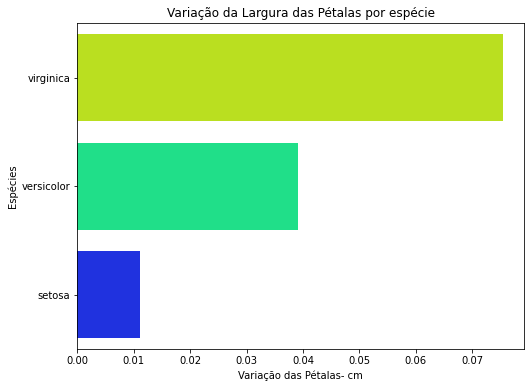

In [85]:
plt.figure(figsize=(8,6))
sns.barplot(data=var_especie, x="variacao", y="species", palette="gist_rainbow") 
plt.title("Variação da Largura das Pétalas por espécie")
plt.xlabel("Variação das Pétalas- cm")
plt.ylabel("Espécies");